### Import necessary packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Download sample data from IBM Object Storage

In [3]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2018-10-10 08:01:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   139KB/s    in 0.5s    

2018-10-10 08:01:11 (139 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### Read data in to DataFrame and explore

In [2]:
df = pd.read_csv("FuelConsumption.csv")

#summarize the data
print("dataframe description: \n", df.describe())

#limit scope to cylinders, engine size, emissions, and fuel consumption
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
print("\n\ncondenced dataframe head: \n", cdf.head())

dataframe description: 
        MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000  

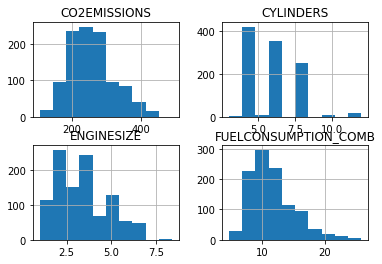

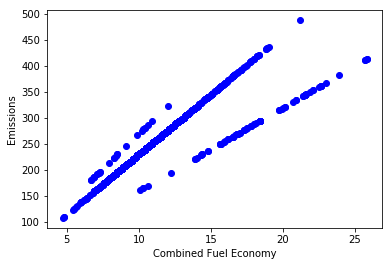

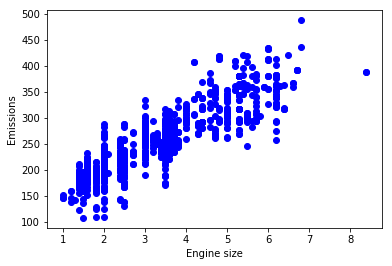

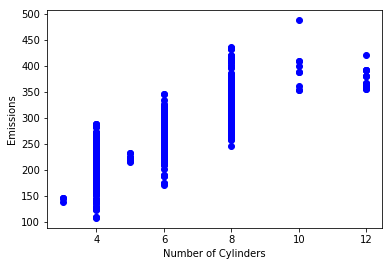

In [3]:
#plot each of the features above
viz = cdf
viz.hist()
plt.show()

#plot each of the features above Vs emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Combined Fuel Economy")
plt.ylabel("Emissions")
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of Cylinders")
plt.ylabel("Emissions")
plt.show()

### Create train and test dataset

In [4]:
msk = np.random.rand(len(df)) < 0.8
training_data = cdf[msk]
testing_data = cdf[~msk]

### Polynomial Regression Model

In [11]:
#modeling with sklearn package
from sklearn import PlynomialFeatures
from sklearn import linear_model

regression = linear_model.LinearRegression()
train_x = np.asanyarray(training_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(training_data[['CO2EMISSIONS']])

regression.fit (train_x, train_y)

#these are the coefficients
print('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)


Coefficients:  [[11.67814393  6.71079237  9.57027754]]
Intercept:  [67.22784638]


### Model evaluation

In [10]:
#evaluate model using Mean Squared Error (MSE)
from sklearn.metrics import r2_score

test_x = np.asanyarray(testing_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(testing_data[['CO2EMISSIONS']])
test_y_hat = regression.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y ** 2)))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))

Mean absolute error: 16.18
Residual sum of squares (MSE): -69368.89
R2-score: 0.86
